# Module 4: Peer Reviewed Assignment

### Outline:
The objectives for this assignment:

1. Understand mean intervals and Prediction Intervals through read data applications and visualizations.
2. Observe how CIs and PIs change on different data sets.
3. Observe and analyze interval curvature.
4. Apply understanding of causation to experimental and observational studies.

General tips:

1. Read the questions carefully to understand what is being asked.
2. This work will be reviewed by another human, so make sure that you are clear and concise in what your explanations and answers.

In [109]:
# This cell loads the necesary libraries for this assignment
library(tidyverse)
library(ggplot2)

## Problem 1: Interpreting Intervals

For this problem, we're going to practice creating and interpreting Confidence (Mean) Intervals and Prediction Intervals. To do so, we're going to use data in U.S. State Wine Consumption (millions of liters) and Population (millions).

#### 1. (a) Initial Inspections

Load in the data and create a scatterplot with `population` on the x-axis and `totWine` on the y-axis. For fun, set the color of the point to be `#CFB87C`.

,State,pcWine,pop,totWine
,<fct>,<dbl>,<dbl>,<dbl>
1,Alabama,6.0,4.829479,28.976874
2,Alaska,10.9,0.736879,8.031981
3,Arizona,9.7,6.624617,64.258785
4,Arkansas,4.2,2.958663,12.426385
5,California,14.0,38.335203,536.692842
6,Colorado,8.7,5.267603,45.828146


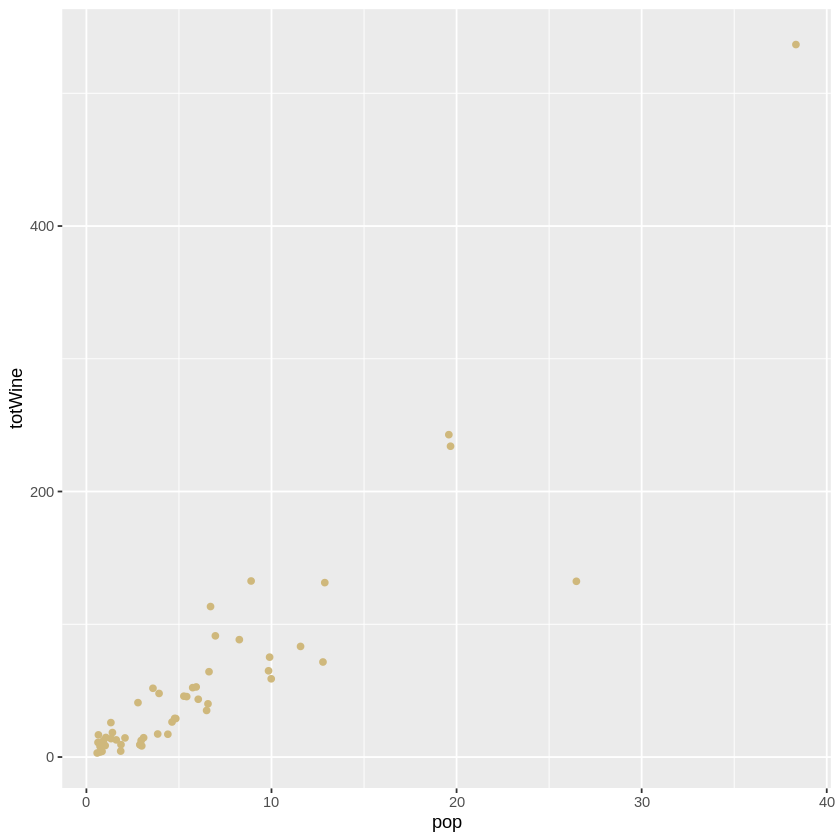

In [110]:
# Load the data
wine.data = read.csv("wine_state_2013.csv")
head(wine.data)
# Your Code Here'

wine.plot = ggplot(wine.data, aes(x=pop,y=totWine)) + geom_point(colour="#CFB87C"); wine.plot

#### 1. (b) Confidence Intervals

Fit a linear regression with `totWine` as the response and `pop` as the predictor. Add the regression line to your scatterplot. For fun, set its color to gold with `col=#CFB87C`. Add the $90\%$ Confidence Interval for the regression line to the plot.

Then choose a single point-value population and display the upper and lower values for the Confidence Interval at that point. In words, explain what this interval means for that data point.

In [111]:
# Your Code Here
wine.lm = lm(totWine~pop,wine.data)
wine.CI = predict(object=wine.lm, interval="confidence", level=0.90)

wine.data <- cbind(wine.data, wine.CI);

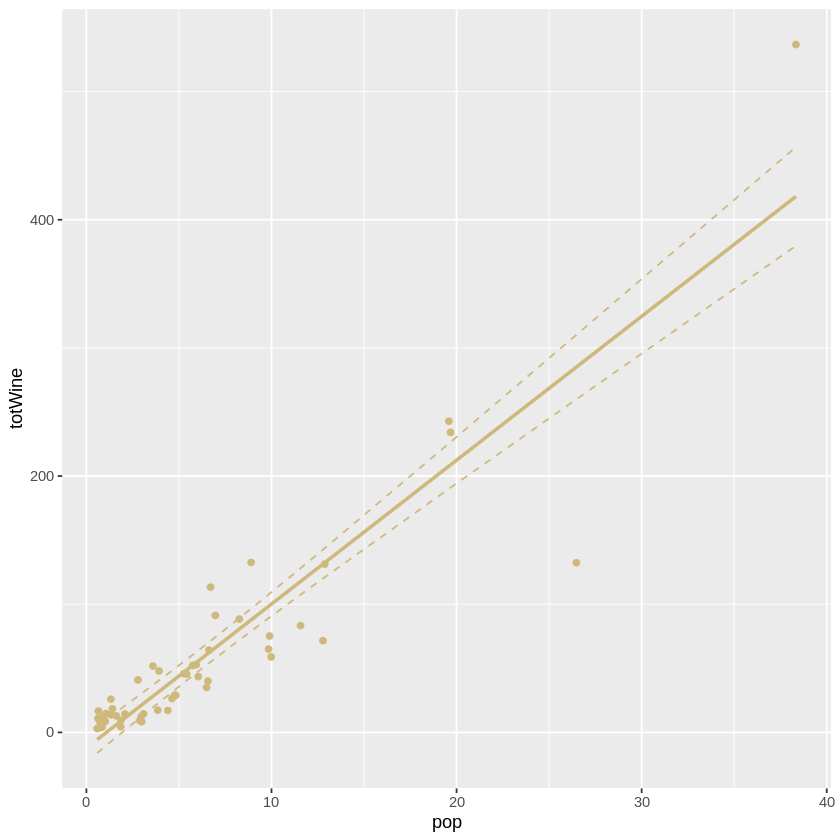

In [112]:
wine.plot = ggplot(wine.data, aes(x=pop,y=totWine)) + 
            geom_point(colour="#CFB87C") + 
            geom_line(aes(y=lwr), colour = "#CFB87C", linetype = "dashed") + 
            geom_line(aes(y=upr), colour = "#CFB87C", linetype = "dashed") +
            geom_smooth(data=wine.data, se=FALSE, formula=y~x, method=lm, color="#CFB87C"); wine.plot

In [113]:
head(wine.data,3)

,State,pcWine,pop,totWine,fit,lwr,upr
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Alabama,6.0,4.829479,28.976874,42.09342,33.76820,50.418648
2,Alaska,10.9,0.736879,8.031981,-3.84906,-14.22844,6.530318
3,Arizona,9.7,6.624617,64.258785,62.24519,54.06129,70.429082


Above we see the first 3 rows of the new wine data frame. Let's particularly look at Arizona with a population value of 6.624617. The upper and lower bound for the 90% confidence interval are 54.06129 and 70.429082 respectively. Interpreting this, we are 90% sure that the predicted point falls between those values. It happens to be 62.24519, which falls in this range.

#### 1. (c) Prediction Intervals

Using the same `pop` point-value as in **1.b**, plot the prediction interval end points. In words, explain what this interval means for that data point.

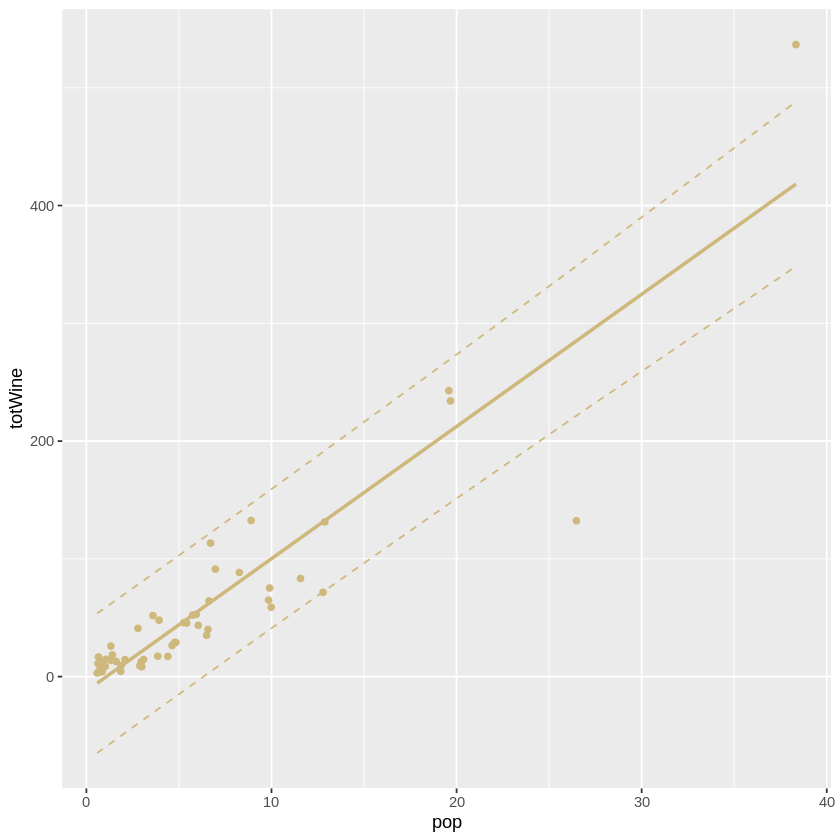

In [122]:
# Your Code Here
wine.lm = lm(totWine~pop,wine.data)

wine.pred = predict(object=wine.lm, newdata=wine.data, interval="prediction", level=0.90)

wine.data = wine.data[,1:4]

wine.data.1 <- cbind(wine.data, wine.pred);

wine.plot = ggplot(wine.data.1, aes(x=pop,y=totWine)) + 
            geom_point(colour="#CFB87C") + 
            geom_line(aes(y=lwr), colour = "#CFB87C", linetype = "dashed") + 
            geom_line(aes(y=upr), colour = "#CFB87C", linetype = "dashed") +
            geom_smooth(data=wine.data.1, se=FALSE, formula=y~x, method=lm, color="#CFB87C"); wine.plot

The prediction interval is the estimate of an interval on which the predicted observations lie with 90% probability. It is based on the training set of already observed data points.

#### 1. (d) Some "Consequences" of Linear Regression

As you've probably gathered by now, there is a lot of math that goes into fitting linear models. It's important that you're exposed to these underlying systems and build an intuition for how certain processes work. However, some of the math can be a bit too... tedious for us to make you go through on your own. Below are a list of "consequences" of linear regression, things that are mathematically true because of the assumptions and formulations of the linear model (let $\widehat\varepsilon_i$ be the residuals of the regression model):

1. $\sum \widehat\varepsilon_i = 0$ : The sum of residuals is 0.
2. $\sum \widehat\varepsilon_i^2$ is as small as it can be.
3. $\sum x_i \widehat\varepsilon_i = 0$
4. $\sum \hat{y}_i \widehat\varepsilon_i = 0$ : The Residuals are orthogonal to the fitted values.
5. The Regression Line always goes through $(\bar{x}, \bar{y})$.

Check that your regression model confirms the "consequences" $1,3,4$ and $5$. For consequence $2$, give a logical reason on why this formulation makes sense.

**Note: even if your data agrees with these claims, that does not prove them as fact. For best practice, try to prove these facts yourself!**

[1] "1. The sum of residuals is -2.00672811700997e-14, which is close to 0."

[1] "2. The squared sum of residuals is 59325.9321729453, which is as small as it can be."

[1] "3. The sum of residuals multiplied by each x is 0."

[1] "4. The sum of residuals multiplied by each x is 0."

[1] "5. The regression line always goes through (mean-x,mean-y):"

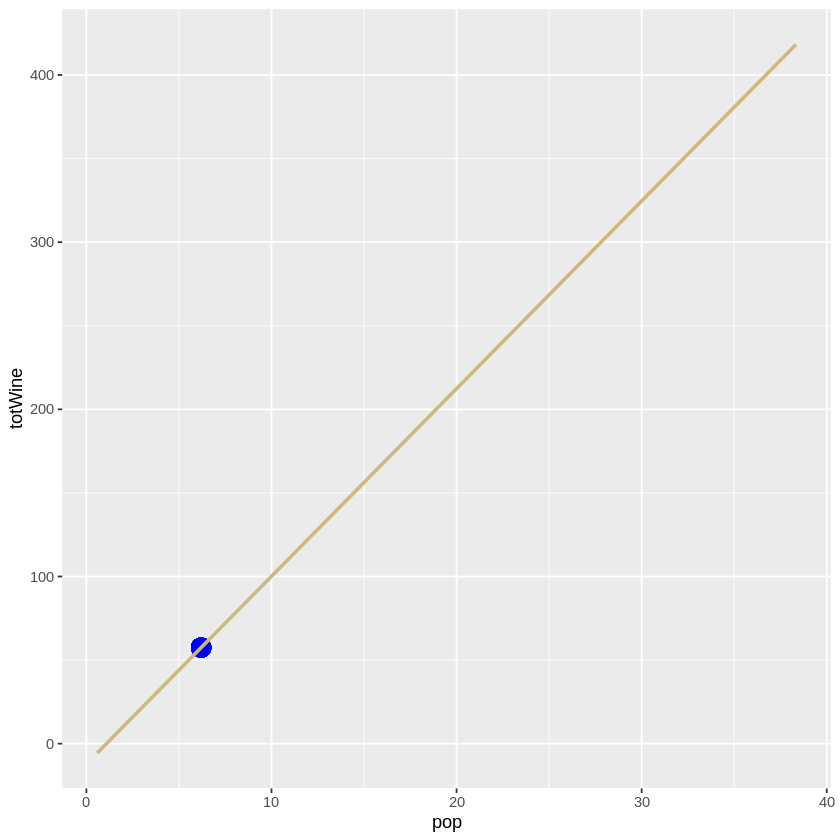

In [216]:
# Your Code Here

# The sum of residuals is 0.
sprintf("1. The sum of residuals is %s, which is close to 0.",sum(wine.lm$residuals))
sprintf("2. The squared sum of residuals is %s, which is as small as it can be.",sum(wine.lm$residuals^2))
sprintf("3. The sum of residuals multiplied by each x is %s.",sum(wine.data$pop*wine.lm$residuals2))
sprintf("4. The sum of residuals multiplied by each x is %s.",sum(wine.data$pop*wine.lm$residuals2))
sprintf("5. The regression line always goes through (mean-x,mean-y):")
check5 = ggplot(wine.data, aes(x=pop,y=totWine)) + 
            geom_point(color = "blue", size=5, aes(x=mean(pop),y=mean(totWine))) + 
            geom_smooth(data=wine.data, se=FALSE, formula=y~x, method=lm, color="#CFB87C"); check5


For consequence  2, the formulation makes sense because the sum of residuals is 0 and the residuals are distributed about 0. The sum of the squares will be as small as it can be although it may be large.

# Problem 2: Explanation

<img src="xkcd_correlation.png" style="width:600px;"/>

Image Source: https://xkcd.com/552/

Did our wine drinking data come from an experiment or an observational study? Do you think we can infer causation between population and the amount of wine drank from these data?

The data came from an observational study, and I think that we can infer causation bar any extraneous factors like culture or regionality. It would make sense to infer that increased population correlation increased wine

# Problem 3: Even More Intervals!

We're almost done! There is just a few more details about Confidence Intervals and Perdiction Intervals which we want to go over. How does changing the data affect the confidence interval? That's a hard question to answer with a single dataset, so let's simulate a bunch of different datasets and see what they intervals they produce.

#### 3. (a) Visualize the data

The code cell below generates 20 data points from two different normal distributions. Finish the code by fitting a linear model to the data and plotting the results with ggplot, with Confidence Intervals for the mean and Prediction Intervals included. 

Experiment with different means and variances. Does changing these values affect the CI or PI?

In [155]:
gen_data <- function(mu1, mu2, var1, var2){
    # Function to generate 20 data points from 2 different normal distributions.
    x.1 = rnorm(10, mu1, 2)
    x.2 = rnorm(10, mu2, 2)
    y.1 = 2 + 2*x.1 + rnorm(10, 0, var1)
    y.2 = 2 + 2*x.2 + rnorm(10, 0, var2)

    df = data.frame(x=c(x.1, x.2), y=c(y.1, y.2))
    return(df)
}

set.seed(0)
head(gen_data(-8, 8, 10, 10))

,x,y
,<dbl>,<dbl>
1,-5.474091,-11.1908617
2,-8.652467,-11.5309770
3,-5.340401,-7.3474393
4,-5.455141,-0.8683876
5,-7.170717,-12.9125020
6,-11.079900,-15.1237204


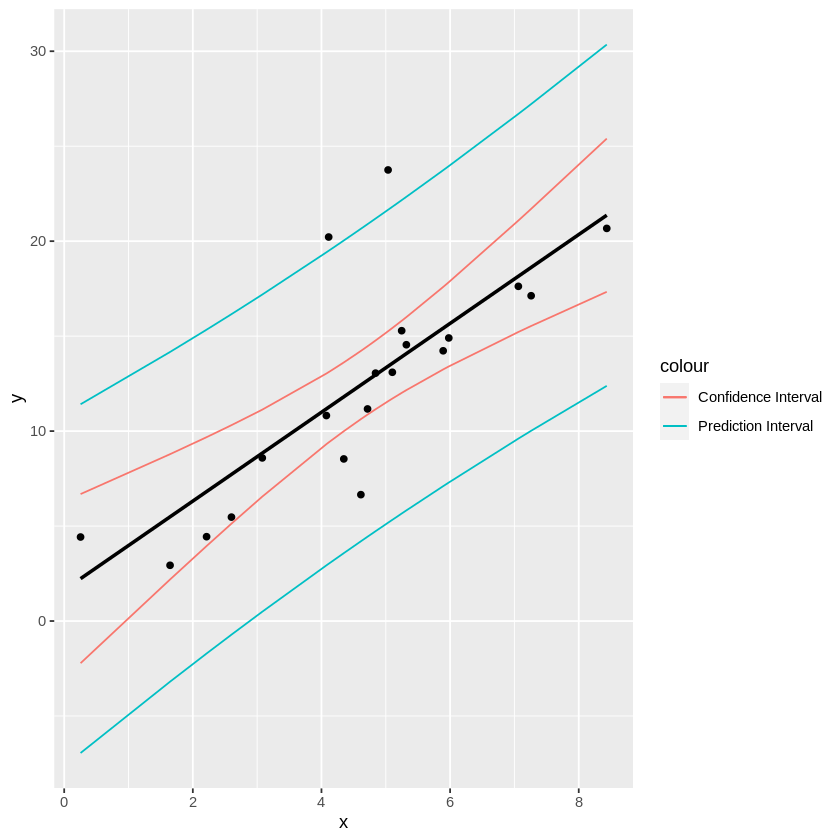

In [227]:
# Your Code Here
gen.data = gen_data(5,3,2,4)

gen.modl = lm(gen.data,formula=y~x)

gen.PI = predict(object=gen.modl,newdata=gen.data,interval="prediction",level=0.95);
gen.CI = predict(object=gen.modl,newdata=gen.data,interval="confidence",level=0.95);

colnames(gen.CI) = c("CIfit","CIlwr","CIupr")
colnames(gen.PI) = c("PIfit","PIlwr","PIupr")

gen.df <- cbind(gen.data, gen.CI, gen.PI);

gen.plot = ggplot(gen.df, aes(x=x,y=y)) + geom_point() + 
            geom_line(aes(y=CIlwr,color="Confidence Interval")) + 
            geom_line(aes(y=CIupr,color="Confidence Interval")) +
            geom_line(aes(y=PIlwr,color="Prediction Interval")) + 
            geom_line(aes(y=PIupr,color="Prediction Interval")) +
            geom_smooth(data=gen.data, se=FALSE, formula=y~x, method=lm, color="black")
gen.plot

Changing the variances change the CI and PI. Larger variations mean that the CI and PI become wider, whereas smaller variations make the intervals narrower.

#### 3. (b) The Smallest Interval

Recall that the Confidence (Mean) Interval, when the predictor value is $x_k$, is defined as:

$$
\hat{y}_h \pm t_{\alpha/2,n-2} \sqrt{MSE \times \Big( \dfrac{1}{n} + \dfrac{(x_k - \bar{x})^2}{\sum(x_i - \bar{x})} \Big)}
$$

where $\hat{y}_h$ is the fitted response for predictor value $x_h$, $t_{\alpha/2,n-2}$ is the t-value with $n-2$ degrees of freedom and $MSE \times \Big( \dfrac{1}{n} + \dfrac{(x_h - \bar{x})^2}{\sum(x_i - \bar{x})} \Big)$ is the standard error of the fit.

From the above equation, what value of $x_k$ would result in the CI with the shortest width? Does this match up with the simulated data? Can you give an intuitive reason for why this occurs?

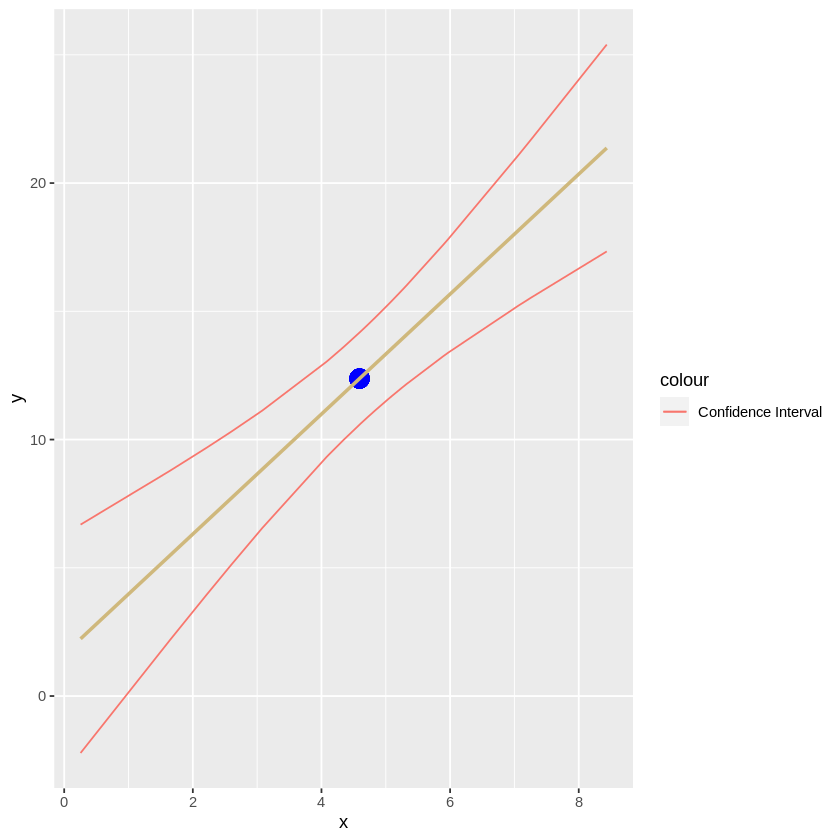

In [231]:
# Your Code Here
show.3b = ggplot(gen.df, aes(x=x,y=y)) + 
            geom_point(color = "blue", size=5, aes(x=mean(x),y=mean(y))) + 
            geom_line(aes(y=CIlwr,color="Confidence Interval")) + 
            geom_line(aes(y=CIupr,color="Confidence Interval")) +
            geom_smooth(data=gen.modl, se=FALSE, formula=y~x, method=lm, color="#CFB87C"); show.3b

The mean would minimize the confidence interval, and this makes sense intuitively since if $x_k = \bar{x}$, then $(x_k-\bar{x})^2=0$ and is minimized. The matches up with the simulated data because the interval visually narrows towards the mean (showed in figure above).

#### 3. (c) Interviewing the Intervals

Recall that the Prediction Interval, when the predictor value is $x_k$, is defined as:

$$
\hat{y}_h \pm t_{\alpha/2,n-2} \sqrt{MSE \Big( 1 + \dfrac{1}{n} + \dfrac{(x_k - \bar{x})^2}{\sum(x_i - \bar{x})} \Big)}
$$

Does the "width" of the Prediction Interval change at different population values? Explain why or why not.

The width of the prediction interval does change toward the mean, but not as much as the confidence interval due to the difference in the derivation, i.e. $1+\frac{1}{n}+\frac{(x_k - \bar{x})^2}{\sum(x_i - \bar{x})}$ vs $\frac{(x_k - \bar{x})^2}{\sum(x_i - \bar{x})}$.

## Problem 4: Causality

**Please answer the following three questions. Each answer should be clearly labeled, and a few sentences to a paragraph long.**

1. In your own words, describe the fundamental problem of causal inference. How is this problem related to the counterfactual definition of causality?


2. Describe the use of "close substitutes" as a solution to the fundamental problem of causal inference. How does this solve the problem?


3. What is the difference between a *deterministic* theory of causality and a *probabilistic* theory of causality?

1. The fundamental problem of causal inference is that it is difficult to determine whether a relationship is truly cause and effect. Additionally, causality is typically defined using the concept of counterfactuality, which makes identifying causal relationships difficult because the counterfactual scenario is unobservable.

2. Close substitutes are used as estimate counterfactuals when experimental randomization of observed outcomes is not possible. This is an avenue used to find our causal estimand of interest. It solves the problem by closely estimated counterfactuals so that helpful assumptions can be made. 

3. Determination theory of causality claims that causal relations are direct, i.e. If event A happens, then event B happens. Probablistic theory of causality claims that there is some randomness in the causal relationship, i.e. when event A occurs, there is an increased probability of event B occuring.

## Problem 5: Causal inference and ethics

How we think about causality, and the statistical models that we use to learn about causal relationships, have ethical implications. The goal of this problem is to invite you to think through some of those issues and implications.

Statisticians, data scientists, researchers, etc., are not in agreement on the best ways to study and analyze important social problems, such as racial discrimination in the criminal justice system. Lily Hu, a PhD candidate in applied math and philosophy at Harvard, [wrote](https://lpeproject.org/blog/law-liberation-and-causal-inference/) that disagreements about how to best study these problems "well illustrate how the nuts and bolts of causal inference...about the quantitative ventures to compute 'effects of race'...feature a slurry of theoretical, empirical, and normative reasoning that is often displaced into debates about purely technical matters in methodology."

Here are some resources that enter into or comment on this debate:

1. [Statistical controversy on estimating racial bias in the criminal justice system](https://statmodeling.stat.columbia.edu/2020/07/06/statistical-controversy-on-racial-bias-in-the-criminal-justice-system/)

2. [Can Racial Bias in Policing Be Credibly Estimated Using Data Contaminated by Post-Treatment Selection?](https://dcknox.github.io/files/KnoxLoweMummolo_PostTreatmentSelectionPolicing.pdf)

3. [A Causal Framework for Observational Studies of Discrimination](https://5harad.com/papers/post-treatment-bias.pdf)

**Please read Lily Hu's [blog post](https://lpeproject.org/blog/law-liberation-and-causal-inference/) and Andrew Gelman's blog post ["Statistical controversy on estimating racial bias in the criminal justice system"](https://statmodeling.stat.columbia.edu/2020/07/06/statistical-controversy-on-racial-bias-in-the-criminal-justice-system/) (and feel free to continue on with the other two papers!) to familiarize yourself with some of the issues in this debate. Then, write a short essay (300-500 words) summarizing this debate. Some important items to consider:**

1. How does the "fundamental problem of causal inference" play out in these discussions?


2. What are some "possible distortionary effect[s] of using arrest data from administrative police records to measure causal effects of race"?


3. What role do assumptions (both statistical and otherwise) play in this debate? To what extent are assumptions made by different researchers falsifiable?



The debate around causal inference and racial bias stems from the controversy between empirical analysis and normative reasoning. The main issue is concerned with methodology of creating unbiased and ethical assessments of racial discrimination. The fundamental problem of causal inference plays out in these discussion creating a schism between two schools of thought. On one side of the issue is the belief that race is downstream to other parameters and causal inference is a run-of-the-mill process that bears no effect on resulting conclusions. On the other side, it is a bit more complicated and inferencing needs more caution to really describe the location and effect of bias. On both sides, according to Gelman, is the understanding that making inferences on racial bias in many cases does not capture the whole story, whether it be because causal relationships can not be determined from the kind of data available, or because casual relationships follow the probabalistic theory of causality.
Furthermore, the data used in this area of study can be biased as administrative police records are labels retroactively and are considered to be post-treatment data. This skews the results of any inferencing because the population data is some subset of a wider population that doesn't necessarily exist in the real world. On top of this, the data is sensitive to the police department because policies can change in different regions. And, on top of everything discussed, the number of assumptions is nearly infinite due to the nature of inferential statistics. The determination of causality depends on assumptions from the get-go. Deterministic causation assumes that A causes B and other conditions are not necessarily significant. Probabilistic causation makes the assumption that pre-conditioning has an effect on the outcome and thus needs further assumption in the declaration of close substitutes to account for counterfactual scenarios. Overall, the debate is rife with disgreements in methodology and framework. 